In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing Data
data = pd.read_csv('./data.csv')
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


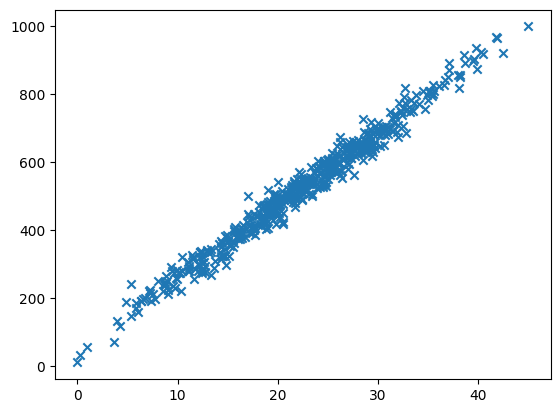

In [3]:
#Plotting the graph (Temperature v/s Revenue)
plt.scatter(data.Temperature, data.Revenue, marker = "x")

In [4]:
#Now to start predicting, we need to fit the model
def fitSLR(X,y):
    #Preprocessing
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    data = pd.concat([X,y], axis=1)
    
    #Calculating mean for both Target and Feature Variable
    meanX = float(X.mean())
    meanY = float(y.mean())
    
    #Calculating `x-mean` and `y-mean` for each data point
    data['x-mean'] = X - meanX
    data['y-mean'] = y - meanY
    
    #Also calculating product(`x-mean, y-mean`) and square(x-mean)
    data['mul'] = data['x-mean'] * data['y-mean']
    data['sq'] = np.power(data['x-mean'], 2)
    
    #Summation of data['mul'] and data['sq']
    sumXY = data['mul'].sum()
    sumX = data['sq'].sum()
    
    #Calculating the coefficients or weights
    global b1, b0
    b1 = sumXY/sumX
    b0 = meanY - b1 * meanX
    
    #We will be returning the coefficients/weights from this function
    return b0, b1

In [5]:
fitSLR(data.Temperature, data.Revenue)

/var/folders/y5/2xbj3tnn1x3gjs25dzbrhlsm0000gn/T/ipykernel_8801/1260511820.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  meanX = float(X.mean())
/var/folders/y5/2xbj3tnn1x3gjs25dzbrhlsm0000gn/T/ipykernel_8801/1260511820.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  meanY = float(y.mean())


(44.831267090563585, 21.44362551068026)

In [6]:
#Now that we have fitted the data, we will now have to predict!
def predict(X):
    predList, y = [], []
    for i in range(0, len(X)):
        predList.append(X[i])
    for i in predList:
        itemY = b0 + b1 * i
        y.append(itemY)
    return y

In [7]:
#Let us predict on the first five elements of the dataset, usually there should be train-test-validation dataset,
#As this is just a demo, we will be predicting on the given dataset itself!
predict(data.Temperature.head())

[571.634336557209,
 602.4768474448201,
 640.7614972276658,
 486.4699191697509,
 291.50796254571776]

In [8]:
#Let us see what is our original values for the same!
data.Revenue.head()

0    534.799028
1    625.190122
2    660.632289
3    487.706960
4    316.240194
Name: Revenue, dtype: float64

In [9]:
#Predicting on the whole dataset
predList = predict(data.Temperature)

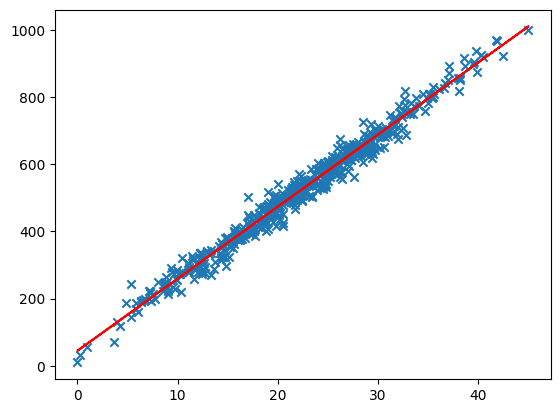

In [10]:
plt.scatter(data.Temperature, data.Revenue, marker='x') #Original Data
plt.plot(data.Temperature, predList, color='red') #Best Fit Line